## Deliverable 1 - Data Cleaning and Preparation
BANA 785 <br>
Christine Dorward, Adit Shetty, Mind Tienpasertkij

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    #return df

In [3]:
## Mind's Directory
#mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
## Adit's Directory
mydir = "/Users/Adit/Desktop/BANA_785/"
## Christine's Directory
##mydir = "C:/users/chrdo/Downloads/"

#customerData = mydir + "Wegmans Customer Data.csv"
#itemData = mydir + "Wegmans Item Data.csv"
#salesData = mydir + "Wegmans Sales Data.csv"
#locationData = mydir + "Wegmans Location Data.csv"
#customer = pd.read_csv(customerData)
#item = pd.read_csv(itemData)
#sales = pd.read_csv(salesData)
#location = pd.read_csv(locationData)
mergeData = mydir + "WegmansFinalMerged.csv"
mergedf = pd.read_csv(mergeData)


### Customer Dataset

In [4]:
customer

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100K-125K,0.0
1,4111,4111,58.0,30K-40K,1.0
2,655,655,67.0,NaN,NaN
3,1999,1999,NaN,NaN,NaN
4,1423,1423,79.0,30K-40K,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,<10K,2.0
7044,4753,1187,50.0,30K-40K,1.0
7045,5905,3514,57.0,40K-50K,0.0
7046,5713,1114,62.0,30K-40K,2.0


#### Things to do:
- Examine the data types
- Look at unique values in HH_INCOME and changing the format of the data
    - Use the lower end of the range as the value
    - EX: <10K -> 10000; 15K-20K -> 15000; 20K-30K -> 20000, so on
- Change HH_INCOME to numeric variable for further analysis purpose
- Deal with NaN values in HOH_AGE, HH_INCOME, HH_CHILDREN columns
    - Without NA version
        - drop rows with NA values
    - With NA version
        - use median for HOH_AGE
            - Chose median based on some research on whether to use mean/median for age
            - Outliers can mess with future data analysis
            - Sources
                - https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age
        - use mean for HH_INCOME
            - Chose mean after plotting a boxplot - there are no outliers in the dataset
        - use median for HH_CHILDREN
            - Chose median so outliers can't affect our future analysis
- Export datasets into CSV
    - Wegmans Customer Data without NA.csv
    - Wegmans Customer Data with NA.csv

In [5]:
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME        object
HH_CHILDREN     float64
dtype: object

In [6]:
print("\nCount total NaN at each column in Customer dataset:\n", customer.isnull().sum())

print("\nPercent of total rows with NaN for HOH_AGE Column: ", 
      round((customer['HOH_AGE'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_INCOME Column: ", 
      round((customer['HH_INCOME'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_CHILDREN Column: ", 
      round((customer['HH_CHILDREN'].isnull().sum()/len(customer))*100,2), "%")


Count total NaN at each column in Customer dataset:
 CUSTOMER_ID       0
HOUSEHOLD_ID      0
HOH_AGE         340
HH_INCOME       665
HH_CHILDREN     916
dtype: int64

Percent of total rows with NaN for HOH_AGE Column:  4.82 %
Percent of total rows with NaN for HH_INCOME Column:  9.44 %
Percent of total rows with NaN for HH_CHILDREN Column:  13.0 %


In [7]:
customer['HH_INCOME'].unique()

array(['100K-125K', '30K-40K', nan, '40K-50K', '125K+', '50K-75K',
       '75K-100K', '15K-20K', '20K-30K', '<10K'], dtype=object)

In [8]:
customer.loc[customer['HH_INCOME'] == '<10K', 'HH_INCOME'] = 10000
customer.loc[customer['HH_INCOME'] == '15K-20K', 'HH_INCOME'] = 15000
customer.loc[customer['HH_INCOME'] == '20K-30K', 'HH_INCOME'] = 20000
customer.loc[customer['HH_INCOME'] == '30K-40K', 'HH_INCOME'] = 30000
customer.loc[customer['HH_INCOME'] == '40K-50K', 'HH_INCOME'] = 40000
customer.loc[customer['HH_INCOME'] == '50K-75K', 'HH_INCOME'] = 50000
customer.loc[customer['HH_INCOME'] == '75K-100K', 'HH_INCOME'] = 75000
customer.loc[customer['HH_INCOME'] == '100K-125K', 'HH_INCOME'] = 100000
customer.loc[customer['HH_INCOME'] == '125K+', 'HH_INCOME'] = 125000
customer['HH_INCOME'].unique()

array([100000, 30000, nan, 40000, 125000, 50000, 75000, 15000, 20000,
       10000], dtype=object)

In [9]:
customer["HH_INCOME"] = pd.to_numeric(customer["HH_INCOME"])
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME       float64
HH_CHILDREN     float64
dtype: object

In [10]:
customerWithoutNA = customer.dropna()
customerWithoutNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.0,0.0
1,4111,4111,58.0,30000.0,1.0
4,1423,1423,79.0,30000.0,1.0
5,4687,3801,63.0,100000.0,1.0
6,6415,1244,49.0,40000.0,1.0
...,...,...,...,...,...
7040,2449,2449,41.0,30000.0,0.0
7043,2065,2065,35.0,10000.0,2.0
7044,4753,1187,50.0,30000.0,1.0
7045,5905,3514,57.0,40000.0,0.0


In [11]:
customerWithoutNA.to_csv('Wegmans Customer Data without NA.csv', index=False)

In [12]:
customer.agg({"HOH_AGE": ["min", "max", "median", "mean"],
             "HH_INCOME": ["min", "max", "median", "mean"],
             "HH_CHILDREN": ["min", "max", "median", "mean"],})

,HOH_AGE,HH_INCOME,HH_CHILDREN
min,18.000000,10000.000000,0.000000
max,109.000000,125000.000000,6.000000
median,56.000000,50000.000000,1.000000
mean,55.118068,66348.112173,0.893673


In [13]:
## Copy Customer Dataset to Replace Missing Values
customerWithNA = customer.copy()

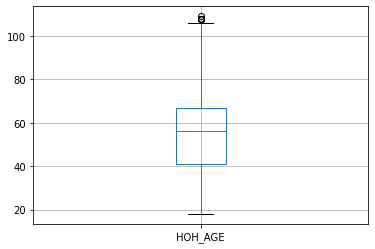

In [14]:
customer.boxplot(column=['HOH_AGE'])

There are outliers in the HOH_AGE column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

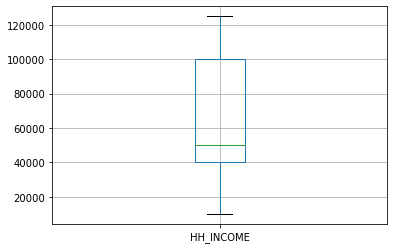

In [15]:
customer.boxplot(column=['HH_INCOME'])

There are no outliers in the HH_INCOME column. Therefore, we decided to use mean to replace NA values.

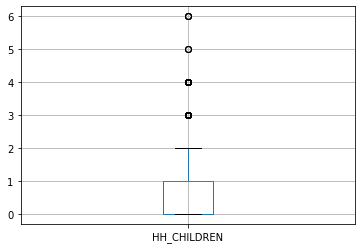

In [16]:
customer.boxplot(column=['HH_CHILDREN'])

There are outliers in the HH_CHILDREN column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

In [17]:
customerWithNA['HOH_AGE'].fillna(value=customerWithNA['HOH_AGE'].median(), inplace=True)
customerWithNA['HH_INCOME'].fillna(value=round(customerWithNA['HH_INCOME'].mean(),2), inplace=True)
customerWithNA['HH_CHILDREN'].fillna(value=customerWithNA['HH_CHILDREN'].median(), inplace=True)

In [18]:
customerWithNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.00,0.0
1,4111,4111,58.0,30000.00,1.0
2,655,655,67.0,66348.11,1.0
3,1999,1999,56.0,66348.11,1.0
4,1423,1423,79.0,30000.00,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,10000.00,2.0
7044,4753,1187,50.0,30000.00,1.0
7045,5905,3514,57.0,40000.00,0.0
7046,5713,1114,62.0,30000.00,2.0


In [19]:
customerWithNA.to_csv('Wegmans Customer Data with NA Replaced.csv', index=False)

### Item Dataset

In [20]:
item

,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND
0,332005,ARR-CENTERPIECE W 3 CANDL 1 EA,42-60-02,FLORAL,ARRANGEMENTS,FOAM ARRANGEMENTS,0,0,1
1,424488,"Scunci U Got This Upzing, Double Combs 1 EA",18-13-25,HEALTH & BEAUTY CARE,HAIR ACCESSORIES,FASHION ACCESSORIES,0,0,0
2,213936,Signature Bouquet 1 EA,42-30-01,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1
3,336252,"Yoplait Original Yogurt, Low Fat, Harvest Peac...",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,0
4,596609,papyTissue 8 CT,45-20-40,CARD DEPARTMENT,CARD SHOP GIFT WRAP,TISSUE PAPER,0,0,0
...,...,...,...,...,...,...,...,...,...
87248,37028,"Wegmans Cheese, Sharp Cheddar, Shredded, FAMI...",02-17-10,DAIRY,SHREDDED CHEESE,TRADITIONAL SHREDDED CHEESE,0,1,1
87249,2816,Altman's Lunch Herring 13 OZ,02-70-02,DAIRY,KOSHER DAIRY,HERRING/SEAFOOD,0,0,0
87250,28954,"Organic Cherry Tomato 4"" 1 EA",03-01-18,PRODUCE,WEGMANS ORGANIC FARM,WOF LIVE PLANTS,1,0,1
87251,16411,"Wegmans Organic Spinach & Spring Mix, FAMILY P...",03-13-42,PRODUCE,SALADS AND SALAD KITS,ORG SALAD BLENDS,1,1,1


#### Things to do:
- Examine the data types
- Identify any columns with NA values

There weren't any NA values. This dataset is good to go!

In [21]:
item.dtypes

ITEM_NBR              int64
ITEM_DESCRIPTION     object
PRODUCT_HIERARCHY    object
DEPARTMENT_NAME      object
CATEGORY_NAME        object
CLASS_NAME           object
IS_ORGANIC            int64
IS_FAMILYPACK         int64
IS_WEGMANSBRAND       int64
dtype: object

In [22]:
print(" \nCount total NaN at each column in Item dataset: \n",
      item.isnull().sum())

 
Count total NaN at each column in Item dataset: 
 ITEM_NBR             0
ITEM_DESCRIPTION     0
PRODUCT_HIERARCHY    0
DEPARTMENT_NAME      0
CATEGORY_NAME        0
CLASS_NAME           0
IS_ORGANIC           0
IS_FAMILYPACK        0
IS_WEGMANSBRAND      0
dtype: int64


### Sales + Location Dataset

In [23]:
sales['TRANSACTION_KEY'] = sales['TRANSACTION_KEY'].astype(int)


In [24]:
location['TRANSACTION_KEY'] = location['TRANSACTION_KEY'].astype(int)

In [25]:
sales

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES
0,-3159570000000000000,7/21/19,96,45177,1,0.0,0.24
1,-3159570000000000000,7/21/19,96,607378,1,0.0,0.86
2,8384650000000000000,1/20/19,590,36353,1,0.0,7.19
3,2162210000000000000,11/7/19,1807,12663,1,0.0,1.43
4,121170000000000000,3/20/19,1832,125639,1,0.0,0.71
...,...,...,...,...,...,...,...
1048570,-3294460000000000000,10/16/20,6682,43637,1,0.0,1.43
1048571,778890000000000000,12/8/20,3885,814129,1,0.0,0.66
1048572,8853080000000000000,5/1/19,2448,580573,1,0.0,4.31
1048573,-963756000000000000,5/1/20,696,10259,1,0.0,2.15


In [111]:
len(sales['DATE_KEY'].value_counts())

726

In [26]:
location

,TRANSACTION_KEY,LOCATION_NBR,INSTACART_IND
0,2690500712181362657,22,1
1,-8773936045043192608,63,1
2,-3661439005258676194,24,1
3,-4733295291706551970,25,1
4,6272747967003556830,20,1
...,...,...,...
441375,-1749134637415514696,24,0
441376,4577840945846652328,25,0
441377,-5971732586820603428,24,0
441378,3009082540181272219,24,0


#### Things to do:
- Examine the data types
- Identify any columns with NA values
- Merge location and sales datasets by TRANSACTION_KEY

There weren't any NA values in this dataset. All we had to do was merging location and sales dataset on TRANSACTION_KEY column.

In [27]:
sales.dtypes

TRANSACTION_KEY      int64
DATE_KEY            object
CUSTOMER_ID          int64
ITEM_NBR             int64
UNITS                int64
WEIGHT             float64
SALES              float64
dtype: object

In [28]:
location.dtypes

TRANSACTION_KEY    int64
LOCATION_NBR       int64
INSTACART_IND      int64
dtype: object

In [29]:
print(" \nCount total NaN at each column in Sales dataset: \n",
      sales.isnull().sum())
print(" \nCount total NaN at each column in Location dataset: \n",
      location.isnull().sum())

 
Count total NaN at each column in Sales dataset: 
 TRANSACTION_KEY    0
DATE_KEY           0
CUSTOMER_ID        0
ITEM_NBR           0
UNITS              0
WEIGHT             0
SALES              0
dtype: int64
 
Count total NaN at each column in Location dataset: 
 TRANSACTION_KEY    0
LOCATION_NBR       0
INSTACART_IND      0
dtype: int64


In [30]:
salesLocation = pd.merge(sales, location, on="TRANSACTION_KEY")
salesLocation

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND


In [31]:
sales.to_csv('Wegmans Sales Location.csv', index=False)

### Merging Data

#### Things to do:
- Merge Sales Location Dataset with Item Dataset on ITEM_NBR into salesItem Dataset
    - Wegmans Sales Item.csv
- Merge Sales Location Dataset with Customer Dataset on CUSTOMER_ID into salesCustomers (without NA values) and salesCustomersFull (with NA values)
    - Wegmans Sales Customer.csv
    - Wegmans Sales Customer Full.csv
- Merge salesItem Dataset with salesCustomers (without NA values) and salesCustomersFull (with NA values) into allData (without customer NA values) and allDataFull (with customer NA values)
    - Wegmans All Data.csv
    - Wegmans All Data Full.csv

In [32]:
salesItem = pd.merge(salesLocation, item, on="ITEM_NBR")
salesItem

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND


In [33]:
salesItem.to_csv('Wegmans Sales Item.csv', index=False)

In [34]:
salesCustomers = pd.merge(salesLocation, customerWithoutNA, on="CUSTOMER_ID")
salesCustomers

,TRANSACTION_KEY,DATE_KEY,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN


In [35]:
salesCustomers.to_csv('Wegmans Sales Customer.csv', index=False)

In [36]:
salesCustomersFull = pd.merge(salesLocation, customerWithNA, on="CUSTOMER_ID")
salesCustomersFull

,TRANSACTION_KEY,DATE_KEY,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN


In [37]:
salesCustomersFull.to_csv('Wegmans Sales Customer Full.csv', index=False)

In [38]:
allData = pd.merge(salesItem, customerWithoutNA, on="CUSTOMER_ID")
allData

,TRANSACTION_KEY,DATE_KEY,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,...,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN


In [39]:
allData.to_csv('Wegmans All Data.csv', index=False)

In [40]:
allDataFull = pd.merge(salesItem, customerWithNA, on="CUSTOMER_ID")
allDataFull

,TRANSACTION_KEY,DATE_KEY,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,...,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN


In [41]:
allDataFull.to_csv('Wegmans All Data Full.csv', index=False)

### Cleaning the Wegmans All Data Full Dataset
#### Things to do:
Using allDataFull Dataset
- Delete all January 2021 items (~2.4k rows)
    - They were making YOY analyses look skewed - didn’t add much w/ 2 days
- Delete all discontinued items (~4.5k rows)
    - If available in 2019, but not 2020, we can’t see behavior changes
- Delete all negative units, weights and sales (~700 rows)
    - Skewing pricing analysis
- Create price per unit variable - this is done on Excel
    - Allows us to see price / item rather than just sales in total which aren't consistent based on units / weight


In [42]:
allDataFull_Clean = allDataFull.copy()

In [43]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['SALES'] < 0].index, inplace = True)

In [44]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['DATE_KEY'].str.contains('21$')==True].index, inplace = True)

In [45]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['ITEM_DESCRIPTION'].str.contains('^[zZ][zZ].*')==True].index, inplace = True)

In [46]:
allDataFull_Clean.to_csv('Wegmans All Clean Data.csv', index=False)

### Explanatory Data Analysis

In [47]:
wegmansData = mydir + 'Wegmans All Clean Data.csv'
wegmansAll = pd.read_csv(wegmansData)

In [48]:
wegmansAll

,TRANSACTION_KEY,DATE_KEY,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,...,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN


### Customer Dataset EDA

These are just general idea of our Wegmans data customers' demographic.

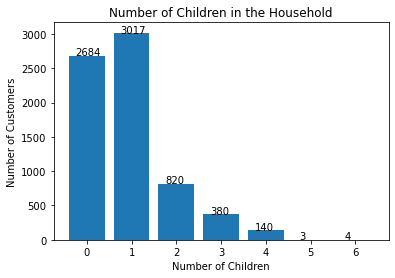

38.08% of the customers have 0 children.
42.81% of the customers have 1 child.
11.63% of the customers have 2 children.
5.39% of the customers have 3 children.
1.99% of the customers have 4 children.
0.04% of the customers have 5 children.
0.06% of the customers have 6 children.


In [49]:
x_children = customerWithNA['HH_CHILDREN'].value_counts().index
y_children = customerWithNA['HH_CHILDREN'].value_counts()

plt.bar(x_children,y_children)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text((i-.25),y[i],y[i])
        
addlabels(x_children, y_children)

plt.title("Number of Children in the Household")

plt.xlabel("Number of Children")
plt.ylabel("Number of Customers")

plt.show()

print(str((round(np.choose(0,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 0 children.')
print(str((round(np.choose(1,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 1 child.')
print(str((round(np.choose(2,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 2 children.')
print(str((round(np.choose(3,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 3 children.')
print(str((round(np.choose(4,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 4 children.')
print(str((round(np.choose(5,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 5 children.')
print(str((round(np.choose(6,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 6 children.')

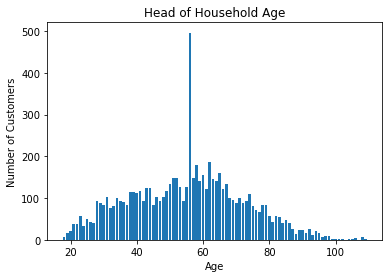

The majority of the customers' head of household age is around 60 years old. There seems to be a normal distribution.


In [50]:
x_age = customerWithNA['HOH_AGE'].value_counts().index
y_age = customerWithNA['HOH_AGE'].value_counts()

plt.bar(x_age,y_age)

plt.title("Head of Household Age")

plt.xlabel("Age")
plt.ylabel("Number of Customers")

plt.show()

print("The majority of the customers' head of household age is around 60 years old. " + 
      "There seems to be a normal distribution.")

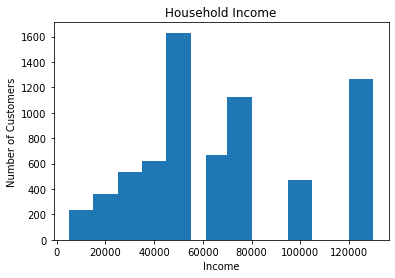

The majority of the customers' household income is in the $50,000 to $75,000 range.
This dataset includes the mean household income of $66,348.11, which was used to replace the NA values.


In [51]:
x_income = customerWithNA['HH_INCOME'].value_counts().index
y_income = customerWithNA['HH_INCOME'].value_counts()

plt.bar(x_income,y_income,10000)

plt.title("Household Income")

plt.xlabel("Income")
plt.ylabel("Number of Customers")

plt.show()

print("The majority of the customers' household income is in the $50,000 to $75,000 range.")
print("This dataset includes the mean household income of $66,348.11, which was used to replace the NA values.")

### Item Dataset EDA

These are just general idea of what Wegmans item we are working with.

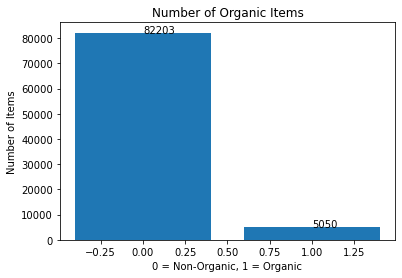

94.21% of the transactions are non-organic.
5.79% of the transactions are organic.


In [52]:
x_organic = item['IS_ORGANIC'].value_counts().index
y_organic = item['IS_ORGANIC'].value_counts()

plt.bar(x_organic,y_organic)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_organic, y_organic)

plt.title("Number of Organic Items")

plt.xlabel("0 = Non-Organic, 1 = Organic")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_organic)/len(item)*100,2))) + '% of the transactions are non-organic.')
print(str((round(np.choose(1,y_organic)/len(item)*100,2))) + '% of the transactions are organic.')

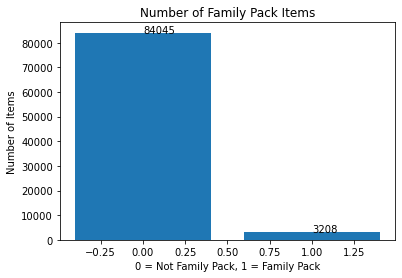

96.32% of the transactions are not family pack.
3.68% of the transactions are family pack.


In [53]:
x_familypack = item['IS_FAMILYPACK'].value_counts().index
y_familypack = item['IS_FAMILYPACK'].value_counts()

plt.bar(x_familypack,y_familypack)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_familypack, y_familypack)

plt.title("Number of Family Pack Items")

plt.xlabel("0 = Not Family Pack, 1 = Family Pack")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_familypack)/len(item)*100,2))) + '% of the transactions are not family pack.')
print(str((round(np.choose(1,y_familypack)/len(item)*100,2))) + '% of the transactions are family pack.')

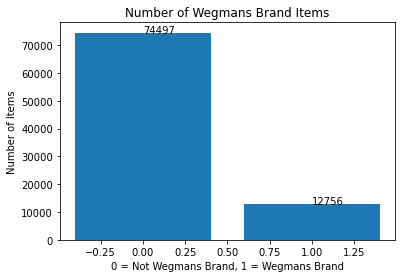

85.38% of the transactions are not Wegmans brand.
14.62% of the transactions are Wegmans brand.


In [54]:
x_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts().index
y_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts()

plt.bar(x_wegmansbrand,y_wegmansbrand)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_wegmansbrand, y_wegmansbrand)

plt.title("Number of Wegmans Brand Items")

plt.xlabel("0 = Not Wegmans Brand, 1 = Wegmans Brand")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_wegmansbrand)/len(item)*100,2))) + '% of the transactions are not Wegmans brand.')
print(str((round(np.choose(1,y_wegmansbrand)/len(item)*100,2))) + '% of the transactions are Wegmans brand.')

In [55]:
salesLocation

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND


### Sales Location Dataset EDA
These are just general idea of what Wegmans sales transactions we are working with.

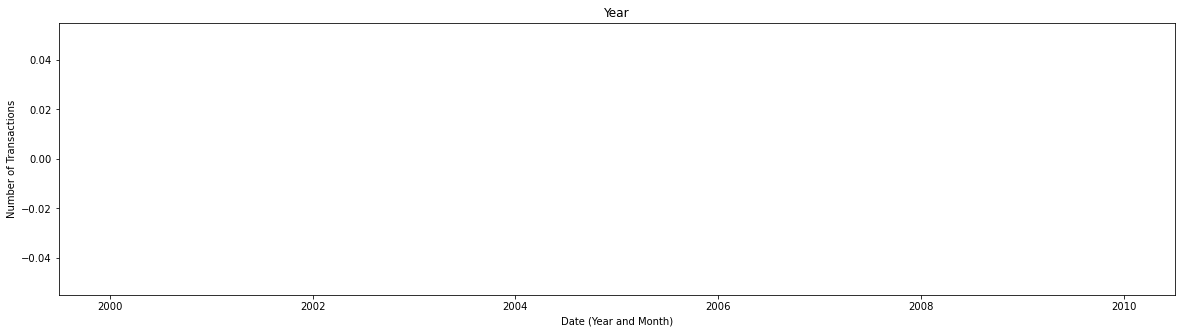

In [56]:
salesLocation["DATE_KEY"] =  pd.to_datetime(salesLocation["DATE_KEY"])
x_date = salesLocation['DATE_KEY'].value_counts().index
y_date = salesLocation['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_date,y_date)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Transactions")
plt.show()

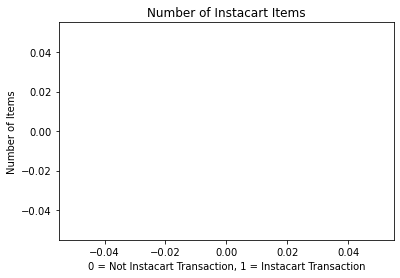

ValueError: 0-length sequence.

In [57]:
x_instacart = salesLocation['INSTACART_IND'].value_counts().index
y_instacart = salesLocation['INSTACART_IND'].value_counts()

plt.bar(x_instacart,y_instacart)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_instacart, y_instacart)

plt.title("Number of Instacart Items")

plt.xlabel("0 = Not Instacart Transaction, 1 = Instacart Transaction")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_instacart)/len(salesLocation)*100,2))) + '% of the transactions are not Instacart Transaction.')
print(str((round(np.choose(1,y_instacart)/len(salesLocation)*100,2))) + '% of the transactions are Instacart Transaction.')

In [ ]:
instacartTransactions = salesLocation[salesLocation['INSTACART_IND'] == 1]

In [ ]:
notInstacartTransactions = salesLocation[salesLocation['INSTACART_IND'] == 0]

In [ ]:
x_dateInsta = instacartTransactions['DATE_KEY'].value_counts().index
y_dateInsta = instacartTransactions['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_dateInsta,y_dateInsta)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Instacart Transactions")
plt.show()

print("We can see that after March 2020, Instacart transactions went up significantly.")

In [ ]:
x_dateNotInsta = notInstacartTransactions['DATE_KEY'].value_counts().index
y_dateNotInsta = notInstacartTransactions['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_dateNotInsta,y_dateNotInsta)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Traditional Transactions")
plt.show()

### Wegmans All Data Full Dataset EDA

In [ ]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_ORGANIC'])['DATE_KEY'].count().unstack()

In [ ]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_FAMILYPACK'])['DATE_KEY'].count().unstack()

In [ ]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_WEGMANSBRAND'])['DATE_KEY'].count().unstack()

In [ ]:
department = wegmansAll.groupby(['DEPARTMENT_NAME', pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year,
                    pd.to_datetime(wegmansAll["DATE_KEY"]).dt.quarter])['DATE_KEY'].count().unstack()

pd.set_option('display.max_rows', department.shape[0]+1)
print(department)

In [ ]:
itemDesc = wegmansAll.groupby(['DEPARTMENT_NAME','ITEM_DESCRIPTION',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
itemDesc = itemDesc.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
itemDesc = itemDesc.groupby('DEPARTMENT_NAME').head(2)
print(itemDesc)

In [ ]:
category = wegmansAll.groupby(['DEPARTMENT_NAME','CATEGORY_NAME',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
category = category.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
category = category.groupby('DEPARTMENT_NAME').head(2)
print(category)

In [ ]:
wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC'])['IS_ORGANIC'].count().unstack()

In [ ]:
incomeOrganic = wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC']).agg({'IS_ORGANIC':'count'})
organicIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_ORGANIC':'count'})
incomeOrganic.div(organicIncome, level = 'HH_INCOME') * 100

In general, the majority of the customers tend to buy more non-organic items than organic items. However, we would need to look more into specifically the 'grocery department' in the future as some other department might not have organic vs. non-organic options. Based on this general idea, we can see that the highest household income range has more percentage of organic items in their transactions.

In [ ]:
incomeWegmansBrand = wegmansAll.groupby(['HH_INCOME', 'IS_WEGMANSBRAND']).agg({'IS_WEGMANSBRAND':'count'})
WegmansBrandIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_WEGMANSBRAND':'count'})
incomeWegmansBrand.div(WegmansBrandIncome, level = 'HH_INCOME') * 100

Generally, we can see that the lowest household income bracket shows that that household bought generally buys more non-Wegmans brand items than Wegmans brand. This is then flipped as the household income bracket increases. It seems that the $100,000 bracket tends to buy more Wegmans Brand products. However, we can see that the percentage of Wegmans Brand items that were purchased are similar across the household income ranges.

In [ ]:
children = wegmansAll.groupby(['HH_CHILDREN', 'IS_FAMILYPACK']).agg({'IS_FAMILYPACK':'count'})
family = wegmansAll.groupby(['HH_CHILDREN']).agg({'IS_FAMILYPACK':'count'})
children.div(family, level = 'HH_CHILDREN') * 100

Generally, we can see that the percentage of Family Pack transactions increases as number of children in the household increases.

### Feature Engineering 
- create features that can aid analysis
- encode and scale data to make data model ready
- create target variable for the analysis

In [ ]:
#create feature to identify whether a purchased item was wegmans organic brand
def isorganic(wegmansAll):
  if wegmansAll['IS_ORGANIC'] & wegmansAll['IS_WEGMANSBRAND'] == 1:
    return 1
  elif wegmansAll['IS_ORGANIC'] == 0:
    return 0
  elif wegmansAll['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [ ]:
#create feature to identify whether a purchased item was wegmans brand family pack
def isfampack(wegmansAll):
  if wegmansAll['IS_FAMILYPACK'] & wegmansAll['IS_WEGMANSBRAND'] == 1:
    return 1
  elif wegmansAll['IS_FAMILYPACK'] == 0:
    return 0
  elif wegmansAll['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [ ]:
#create feature to identify whether an item was bought in bulk
def isbulk(wegmansAll):
  if wegmansAll['UNITS'] >= 6:
    return 1
  else:
    return 0

In [ ]:
wegmansAll['WEGMANS_ORGANIC'] = wegmansAll.apply(isorganic, axis=1)

In [ ]:
wegmansAll['WEGMANS_FAMPACK'] = wegmansAll.apply(isfampack, axis=1)

In [ ]:
wegmansAll['IS_BULK'] = wegmansAll.apply(isbulk, axis=1)

### Future Analysis Ideas
- Run more time-series regression and compare the behavior between 2019 and 2020
- Look into more specific departments and item class/description
- Look more specifically into how choices of grocery shifted based on time
- Use Treemap package to visualize the product portfolio of the transactions in R

In [4]:
mergedf.dtypes

TRANSACTION_KEY      float64
DATE_KEY              object
CUSTOMER_ID            int64
ITEM_NBR               int64
UNITS                  int64
WEIGHT               float64
SALES                float64
 PPU                  object
LOCATION_NBR           int64
INSTACART_IND          int64
ITEM_DESCRIPTION      object
PRODUCT_HIERARCHY     object
DEPARTMENT_NAME       object
CATEGORY_NAME         object
CLASS_NAME            object
DEPT.CAT              object
DEPT.CLASS            object
CAT.CLASS             object
IS_ORGANIC             int64
IS_FAMILYPACK          int64
IS_WEGMANSBRAND        int64
HOUSEHOLD_ID           int64
HOH_AGE                int64
HH_INCOME            float64
HH_CHILDREN            int64
cluster                int64
dtype: object

In [5]:
mergedf['DEPARTMENT_NAME'].value_counts()

GROCERY                         350596
PRODUCE                         175370
DAIRY                            91847
FROZEN FOOD                      45276
HEALTH & BEAUTY CARE             42601
MEAT                             37738
CULTURED DAIRY                   34198
BEVERAGE CONTAINER RETURNS       33723
BAKESHOP                         31806
COLD CUTS & CHEESE               21756
ICE CREAM                        15656
IN-STORE BREAD & ROLLS           11393
OLDE WORLD CHEESE                11209
COMMUNITY RELATIONS ITEMS        11090
EGGS                             10868
GM BASIC PRODUCTS DEPARTMENT      9957
DAIRY PRE-PACK                    9830
INSTORE BREAKFAST                 9397
BEER & WINE COOLERS               8800
BULK FOODS                        7424
CARD DEPARTMENT                   6452
IN-STORE DESSERTS                 6449
HOMESTYLE AMERICAN                5962
OF SUBMARINE SHOP                 5119
PIZZA                             4952
FRESH SEAFOOD            

In [201]:
#pd.set_option('display.max_rows', None)
#lst_grocery=merged.loc[test1['DEPARTMENT_NAME'] == 'GROCERY']['DEPT_CAT'] #checking to see dept_cat based on grocery only

In [202]:
#len(lst_grocery.value_counts())

83

In [6]:
mergedf.rename({'DEPT.CAT': 'DEPT_CAT', 'DEPT.CLASS': 'DEPT_CLASS','CAT.CLASS':'CAT_CLASS'}, axis=1, inplace=True)


In [7]:
mergedf.dtypes

TRANSACTION_KEY      float64
DATE_KEY              object
CUSTOMER_ID            int64
ITEM_NBR               int64
UNITS                  int64
WEIGHT               float64
SALES                float64
 PPU                  object
LOCATION_NBR           int64
INSTACART_IND          int64
ITEM_DESCRIPTION      object
PRODUCT_HIERARCHY     object
DEPARTMENT_NAME       object
CATEGORY_NAME         object
CLASS_NAME            object
DEPT_CAT              object
DEPT_CLASS            object
CAT_CLASS             object
IS_ORGANIC             int64
IS_FAMILYPACK          int64
IS_WEGMANSBRAND        int64
HOUSEHOLD_ID           int64
HOH_AGE                int64
HH_INCOME            float64
HH_CHILDREN            int64
cluster                int64
dtype: object

In [8]:
pd.set_option('display.max_rows', 500)
subtest = mergedf[mergedf['DEPT_CAT'].str.contains("CLEAN|SUPPLIES|PAPER|TOILET|TISSUE|DETERGENT|TRASH|BABY|AIR")]

In [9]:
subtest['DEPT_CAT'].value_counts()

CULTURED DAIRY.YOGURT                                        23693
DAIRY.MILK                                                   21514
DAIRY.REFRIGERATED BEVERAGES                                  9807
DAIRY.CREAMS & TOPPINGS                                       9632
DAIRY.SHREDDED CHEESE                                         8097
DAIRY.BUTTER                                                  6167
DAIRY.BULK CHEESE                                             5954
DAIRY.SLICED CHEESE                                           4942
GROCERY.BATH TISSUE                                           4757
DAIRY PRE-PACK.COLD CUTS                                      4522
DAIRY.PLANT BASED BEVERAGES                                   4250
DAIRY.CREAM CHEESE                                            3699
GROCERY.PAPER TOWELS                                          3650
CULTURED DAIRY.SOUR CREAM                                     3443
GROCERY.HOUSEHOLD CLEANERS                                    

In [10]:
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.PAPER TOWELS'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.HOUSEHOLD CLEANERS'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GM BASIC PRODUCTS DEPARTMENT.CLEANING SUPPLIES'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.PAPER NAPKINS'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.BATH TISSUE'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.FACIAL TISSUE'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'


In [11]:
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.LAUNDRY DETERGENT'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.DISH DETERGENT & ADDITIVES'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.AIR CARE'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'HEALTH & BEAUTY CARE.BABY WIPES'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'
mergedf.loc[(mergedf.DEPT_CAT == 'GROCERY.DIAPERS'),'DEPARTMENT_NAME']='CLEANING_SUPPLIES'

In [12]:
mergedf['DEPARTMENT_NAME'].value_counts()

GROCERY                         328087
PRODUCE                         175370
DAIRY                            91847
FROZEN FOOD                      45276
HEALTH & BEAUTY CARE             41816
MEAT                             37738
CULTURED DAIRY                   34198
BEVERAGE CONTAINER RETURNS       33723
BAKESHOP                         31806
CLEANING_SUPPLIES                23294
COLD CUTS & CHEESE               21756
ICE CREAM                        15656
IN-STORE BREAD & ROLLS           11393
OLDE WORLD CHEESE                11209
COMMUNITY RELATIONS ITEMS        11090
EGGS                             10868
GM BASIC PRODUCTS DEPARTMENT      9957
DAIRY PRE-PACK                    9830
INSTORE BREAKFAST                 9397
BEER & WINE COOLERS               8800
BULK FOODS                        7424
CARD DEPARTMENT                   6452
IN-STORE DESSERTS                 6449
HOMESTYLE AMERICAN                5962
OF SUBMARINE SHOP                 5119
PIZZA                    

In [13]:
pd.set_option('display.max_columns', 500)
mergedf

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,DEPT_CAT,DEPT_CLASS,CAT_CLASS,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster
0,6.980000e+18,9/13/20,10,27746,1,0.0,5.04,5.04,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
1,-6.860000e+18,6/28/20,10,47754,0,0.0,0.00,-,66,0,Weg2Go Digital Tips 1 EA,73-05-05,COMMUNITY RELATIONS ITEMS,PERSONAL SHOPPING FEES,WEG2GO DIGITAL TIPS,COMMUNITY RELATIONS ITEMS.PERSONAL SHOPPING FEES,COMMUNITY RELATIONS ITEMS.WEG2GO DIGITAL TIPS,PERSONAL SHOPPING FEES.WEG2GO DIGITAL TIPS,0,0,0,10,62,125000.0,2,1
2,-6.860000e+18,6/28/20,10,45978,1,0.0,0.00,-,66,0,Wegmans Kettle Cooked Reduced Fat Original Po...,96-58-01,OF SUBMARINE SHOP,SNACKS/GROCERY,CHIPS/SNACKS,OF SUBMARINE SHOP.SNACKS/GROCERY,OF SUBMARINE SHOP.CHIPS/SNACKS,SNACKS/GROCERY.CHIPS/SNACKS,0,0,1,10,62,125000.0,2,1
3,-6.860000e+18,6/28/20,10,49316,2,0.0,10.80,5.4,66,0,Wegmans Medium Hot Sub (Gluten Free Roll) 1 EA,96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
4,-6.860000e+18,6/28/20,10,27746,1,0.0,4.68,4.68,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037401,-5.190000e+18,11/26/19,7037,128594,1,0.0,6.11,6.11,25,0,"Strawberries, FAMILY PACK 32 OZ",3/31/02,PRODUCE,BERRIES,STRAWBERRIES,PRODUCE.BERRIES,PRODUCE.STRAWBERRIES,BERRIES.STRAWBERRIES,0,1,0,3541,36,30000.0,1,6
1037402,-4.760000e+17,10/30/19,7037,33896,1,0.0,3.95,3.95,25,0,"Wegmans Mixed Peppers, FAMILY PACK 2 LB",3/11/02,PRODUCE,SALAD VEGETABLES,PEPPERS,PRODUCE.SALAD VEGETABLES,PRODUCE.PEPPERS,SALAD VEGETABLES.PEPPERS,0,1,1,3541,36,30000.0,1,6
1037403,-5.550000e+18,7/22/19,7037,89326,1,0.0,2.88,2.88,25,0,Gypsophila 1 EA,42-10-02,FLORAL,FRESH BUNCHES,FILLERS,FLORAL.FRESH BUNCHES,FLORAL.FILLERS,FRESH BUNCHES.FILLERS,0,0,1,3541,36,30000.0,1,6
1037404,-5.550000e+18,7/22/19,7037,722724,0,0.0,0.00,-,25,0,"TJ MAXX Gift Card, $25 1 EA",73-65-20,COMMUNITY RELATIONS ITEMS,GIFT CARDS - 3RD PARTY,DEPARTMENT STORES,COMMUNITY RELATIONS ITEMS.GIFT CARDS - 3RD PARTY,COMMUNITY RELATIONS ITEMS.DEPARTMENT STORES,GIFT CARDS - 3RD PARTY.DEPARTMENT STORES,0,0,0,3541,36,30000.0,1,6


In [14]:
mergedf['TRANSACTION_KEY'] = mergedf['TRANSACTION_KEY'].astype('int64')


In [17]:
pd.set_option('display.max_rows', None)
len(mergedf['DATE_KEY'].value_counts())

724

In [18]:
mergedf['quarter'] = pd.PeriodIndex(mergedf.DATE_KEY, freq='Q')

In [19]:
mergedf.quarter=mergedf.quarter.astype(str)
mergedf.dtypes

TRANSACTION_KEY        int64
DATE_KEY              object
CUSTOMER_ID            int64
ITEM_NBR               int64
UNITS                  int64
WEIGHT               float64
SALES                float64
 PPU                  object
LOCATION_NBR           int64
INSTACART_IND          int64
ITEM_DESCRIPTION      object
PRODUCT_HIERARCHY     object
DEPARTMENT_NAME       object
CATEGORY_NAME         object
CLASS_NAME            object
DEPT_CAT              object
DEPT_CLASS            object
CAT_CLASS             object
IS_ORGANIC             int64
IS_FAMILYPACK          int64
IS_WEGMANSBRAND        int64
HOUSEHOLD_ID           int64
HOH_AGE                int64
HH_INCOME            float64
HH_CHILDREN            int64
cluster                int64
quarter               object
dtype: object

In [20]:
mergedf['DATE_KEY'] = pd.to_datetime(mergedf['DATE_KEY'], errors='coerce')

In [21]:
dept_freq = mergedf.groupby(['DATE_KEY', 'DEPARTMENT_NAME']).size()

In [22]:
pd.set_option('display.max_rows', None)
dept_freq

DATE_KEY    DEPARTMENT_NAME             
2019-01-06  ASIAN                              4
            BAKESHOP                          70
            BEER & WINE COOLERS                8
            BEVERAGE CONTAINER RETURNS        44
            BULK FOODS                        14
            CARD DEPARTMENT                    7
            CLEANING_SUPPLIES                 44
            COLD CUTS & CHEESE                38
            COMMUNITY RELATIONS ITEMS          6
            COSMETICS                          6
            CULTURED DAIRY                   108
            DAIRY                            192
            DAIRY PRE-PACK                    16
            EGGS                              38
            FLORAL                             2
            FRESH SEAFOOD                      6
            FROZEN FOOD                       89
            FROZEN MEAT                        1
            FROZEN SEAFOOD                     2
            GM BASIC PRODUCT

In [23]:
dept_count_cols = mergedf[["DATE_KEY", "DEPARTMENT_NAME"]]

In [24]:
freq=dept_count_cols.groupby(['DATE_KEY','DEPARTMENT_NAME']).size().sort_values().groupby(level=0).tail(1).reset_index()

In [27]:
freq

,DATE_KEY,DOMINANT_CAT,0
0,2019-01-20,GROCERY,155
1,2020-11-26,GROCERY,170
2,2019-11-28,GROCERY,196
3,2019-01-10,GROCERY,249
4,2019-03-27,GROCERY,280
5,2019-05-16,GROCERY,281
6,2019-03-19,GROCERY,281
7,2019-09-11,GROCERY,283
8,2020-02-18,GROCERY,288
9,2019-07-31,GROCERY,291


In [26]:
freq.rename({'DEPARTMENT_NAME': 'DOMINANT_CAT'}, axis=1, inplace=True)


In [34]:
test4 = mergedf.merge(freq,how='left')
test4.rename({0: 'DOM_FREQ'}, axis=1, inplace=True)

In [35]:
test4.head(5) #target variable is DOMINANT_CAT

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,DEPT_CAT,DEPT_CLASS,CAT_CLASS,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster,quarter,DOMINANT_CAT,DOM_FREQ
0,6980000000000000000,2020-09-13,10,27746,1,0.0,5.04,5.04,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,2020Q3,GROCERY,599
1,-6860000000000000000,2020-06-28,10,47754,0,0.0,0.00,-,66,0,Weg2Go Digital Tips 1 EA,73-05-05,COMMUNITY RELATIONS ITEMS,PERSONAL SHOPPING FEES,WEG2GO DIGITAL TIPS,COMMUNITY RELATIONS ITEMS.PERSONAL SHOPPING FEES,COMMUNITY RELATIONS ITEMS.WEG2GO DIGITAL TIPS,PERSONAL SHOPPING FEES.WEG2GO DIGITAL TIPS,0,0,0,10,62,125000.0,2,1,2020Q2,GROCERY,523
2,-6860000000000000000,2020-06-28,10,45978,1,0.0,0.00,-,66,0,Wegmans Kettle Cooked Reduced Fat Original Po...,96-58-01,OF SUBMARINE SHOP,SNACKS/GROCERY,CHIPS/SNACKS,OF SUBMARINE SHOP.SNACKS/GROCERY,OF SUBMARINE SHOP.CHIPS/SNACKS,SNACKS/GROCERY.CHIPS/SNACKS,0,0,1,10,62,125000.0,2,1,2020Q2,GROCERY,523
3,-6860000000000000000,2020-06-28,10,49316,2,0.0,10.80,5.4,66,0,Wegmans Medium Hot Sub (Gluten Free Roll) 1 EA,96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,2020Q2,GROCERY,523
4,-6860000000000000000,2020-06-28,10,27746,1,0.0,4.68,4.68,66,0,"Wegmans Old Fashioned 7"" Cold Sub 1 EA",96-70-01,OF SUBMARINE SHOP,SUBMARINE SANDWICHES,MEDIUM SUBS,OF SUBMARINE SHOP.SUBMARINE SANDWICHES,OF SUBMARINE SHOP.MEDIUM SUBS,SUBMARINE SANDWICHES.MEDIUM SUBS,0,0,1,10,62,125000.0,2,1,2020Q2,GROCERY,523
